In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For data balancing
from imblearn.over_sampling import SMOTE

# For data spliting
from sklearn.model_selection import train_test_split

# For machine learning model
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier

# For evaluating model results
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score

# For hyperparameter tunning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# For controlling warnings
import warnings

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv("C:/Users/hp/Documents/Azubi_2/project_6/Docker_ML/data/Paitients_Files_Train.csv")
test = pd.read_csv("C:/Users/hp/Documents/Azubi_2/project_6/Docker_ML/data/Paitients_Files_Test.csv")

In [6]:
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [7]:
# Renaming columns name
train.rename(columns={"ID": "id", 'PRG': 'plasma_glucose', "PL": "blood_work_result_1", "PR": "blood_pressure", "SK": "blood_work_result_2", "TS": "blood_work_result_3", "M11": "body_mass_index", "BD2": "blood_work_result_4" }, inplace=True)
train.head()

,id,plasma_glucose,blood_work_result_1,blood_pressure,blood_work_result_2,blood_work_result_3,body_mass_index,blood_work_result_4,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [8]:
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [9]:
# Renaming columns name
test.rename(columns={"ID": "id", 'PRG': 'plasma_glucose', "PL": "blood_work_result_1", "PR": "blood_pressure", "SK": "blood_work_result_2", "TS": "blood_work_result_3", "M11": "body_mass_index", "BD2": "blood_work_result_4" }, inplace=True)
test.head()

,id,plasma_glucose,blood_work_result_1,blood_pressure,blood_work_result_2,blood_work_result_3,body_mass_index,blood_work_result_4,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


## Data Cleaning

In [10]:
# Checking duplication
train[train.duplicated()].sum()

id                     0.0
plasma_glucose         0.0
blood_work_result_1    0.0
blood_pressure         0.0
blood_work_result_2    0.0
blood_work_result_3    0.0
body_mass_index        0.0
blood_work_result_4    0.0
Age                    0.0
Insurance              0.0
Sepssis                0.0
dtype: float64

## Explanatory Data Analysis

<b>Sepsis</b> is the body’s overwhelming and life-threatening response to an infection1. It occurs when the immune system releases a large number of chemicals into the blood to fight the infection, triggering widespread inflammation that can lead to organ damage2. Sepsis is considered a medical emergency and requires rapid diagnosis and treatment1.

### How many peoples used for this data?

In [11]:
amount = train.shape[0]
print(f"There are {amount} peoples used in this data")

There are 599 peoples used in this data


In [12]:
train["body_mass_index"] = train["body_mass_index"].astype(float)

### Peoples optimal weight status?

In [13]:
normal = train[(train["body_mass_index"] > 18.5) & (train["body_mass_index"] < 24.5) ].id.count()
over_weight = train[ train["body_mass_index"] < 24.5].id.count()
under_weight = train[ train["body_mass_index"] < 18.5].id.count()

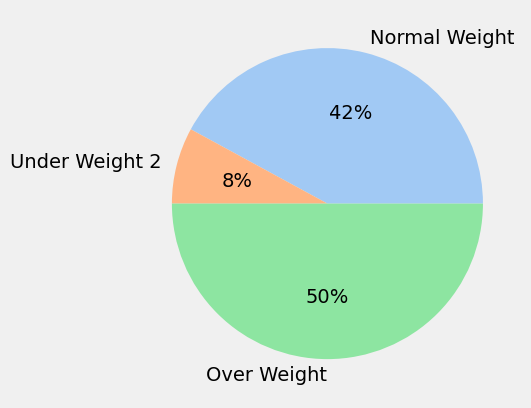

In [14]:
data = [normal, under_weight, over_weight]
labels = ['Normal Weight', 'Under Weight 2', 'Over Weight']

# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[:5]

# Create pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')

# Display the chart
plt.show()


#### The data shows that most of the peoples are over weighted by covering 50% from the whole. It is good to have 42% as normal weight. Now lets see what is the range on obesity is occuring.

In [15]:
over_weight = train[ train["body_mass_index"] < 24.5]

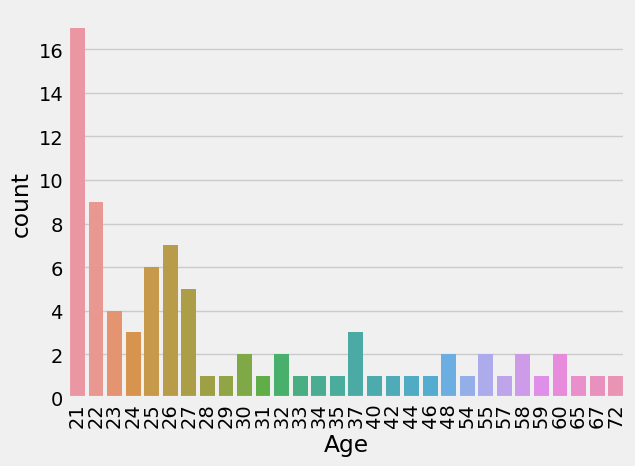

In [16]:
# Load example dataset
tips = sns.load_dataset("tips")

# Create countplot for one column
sns.countplot(x="Age", data=over_weight)

plt.xticks(rotation=90)
plt.show()


#### The chart show us that young peoples are suffered to obesity. Age ranging from 21 to 27 are highly affected.

## Blood Result

In [17]:
under_weight = train[ train["body_mass_index"] < 18.5].id.count()

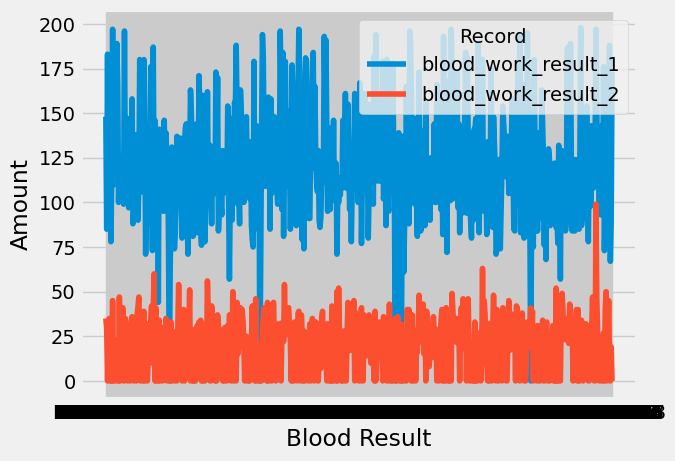

In [18]:
# Create DataFrame
df = train[["id", "blood_work_result_1", "blood_work_result_2"] ]

# Reshape DataFrame from wide to long format
df_long = df.melt(id_vars='id', var_name='Record', value_name='vals')

# Plot multiple columns on the same graph
sns.lineplot(data=df_long, x='id', y='vals', hue='Record')

plt.xlabel("Blood Result")
plt.ylabel("Amount")

# Display the plot
plt.show()


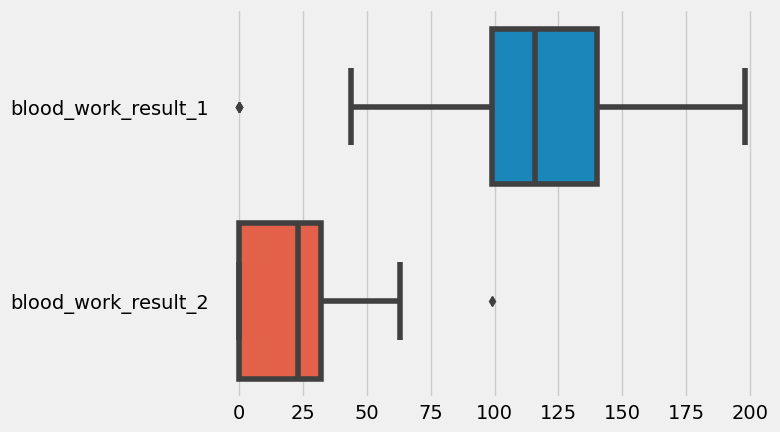

In [19]:
df = pd.DataFrame(data=train, columns=['blood_work_result_1','blood_work_result_2'])

sns.boxplot(data=df, orient='h')

# Show the plot
plt.show()

### Blood work result at first was ranging between 50 to 200. On the next result it ranges 0 to 60. This shows unstability between the blood work. So we can't give high dependency on blood to state good findings. The last two blood works are highly affected  to one side. 

### Unstable Results

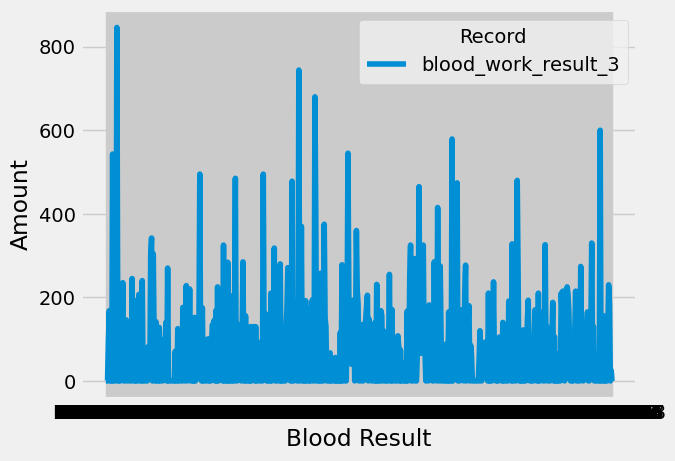

In [20]:
# Create DataFrame
df = train[["id", "blood_work_result_3"] ]

# Reshape DataFrame from wide to long format
df_long = df.melt(id_vars='id', var_name='Record', value_name='vals')

# Plot multiple columns on the same graph
sns.lineplot(data=df_long, x='id', y='vals', hue='Record')

plt.xlabel("Blood Result")
plt.ylabel("Amount")

# Display the plot
plt.show()

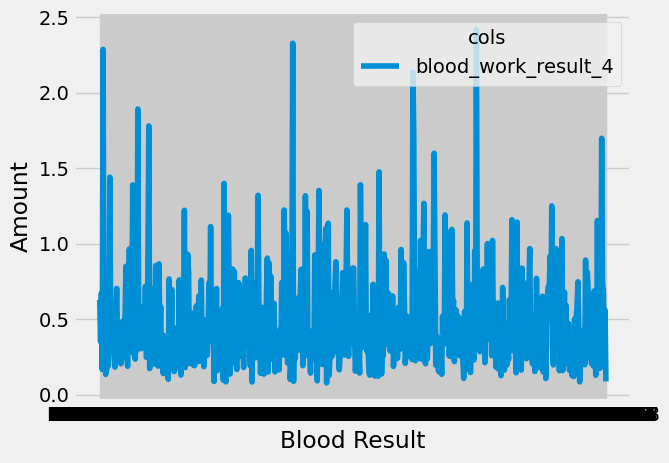

In [21]:
# Create DataFrame
df = train[["id", "blood_work_result_4"] ]

# Reshape DataFrame from wide to long format
df_long = df.melt(id_vars='id', var_name='cols', value_name='vals')

# Plot multiple columns on the same graph
sns.lineplot(data=df_long, x='id', y='vals', hue='cols')

plt.xlabel("Blood Result")
plt.ylabel("Amount")

# Display the plot
plt.show()

### Insurance

In [22]:
has_insurance = train[ train["Insurance"] ==  1]["id"].count()
no_insurance = train[ train["Insurance"] ==  0]["id"].count()

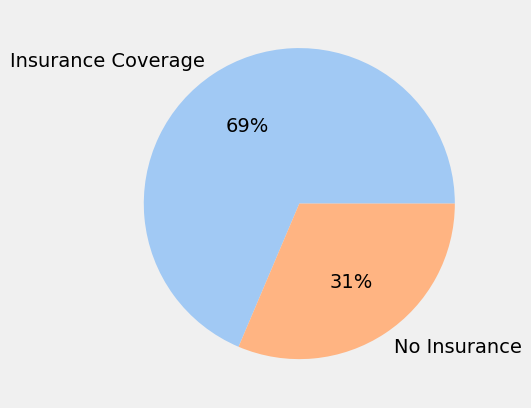

In [23]:
data = [has_insurance, no_insurance]
labels = ['Insurance Coverage', "No Insurance"]

# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[:5]

# Create pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')

# Display the chart
plt.show()

#### more half of the peoples are in insurance coverage. this give us a way to state there is good insurance accessibility.

## Stating hypothesis

<b>Null Hypothesis</b> : There is no significant relation between age and BMI

<b>Alternative Hypothesis</b> : As the age increases the BMI becomes decrease

In [24]:
age = train.Age
bmi = train.body_mass_index

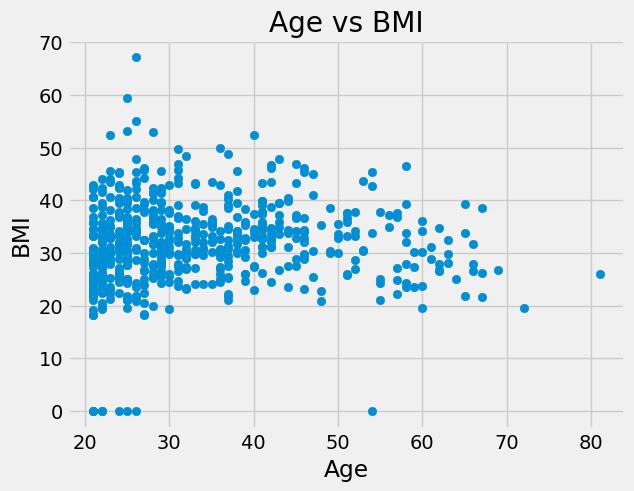

In [25]:
plt.scatter(age, bmi) 
plt.xlabel("Age") 
plt.ylabel("BMI") 
plt.title("Age vs BMI") 
plt.show()

## Linear regression hypothesis testing

In [26]:
import statsmodels.api as sm

In [27]:
X = sm.add_constant(age) 
y = bmi 
model = sm.OLS(y, X) 
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        body_mass_index   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.272
Date:                Sun, 24 Sep 2023   Prob (F-statistic):              0.260
Time:                        17:07:03   Log-Likelihood:                -2095.0
No. Observations:                 599   AIC:                             4194.
Df Residuals:                     597   BIC:                             4203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.8806      0.978     31.581      0.0

<b>INSIGHT</b>

The p-value for the slope coefficient is 0.000, which is less than 0.05 (the significance level). Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between age and BMI.

## Checkinng for outliers

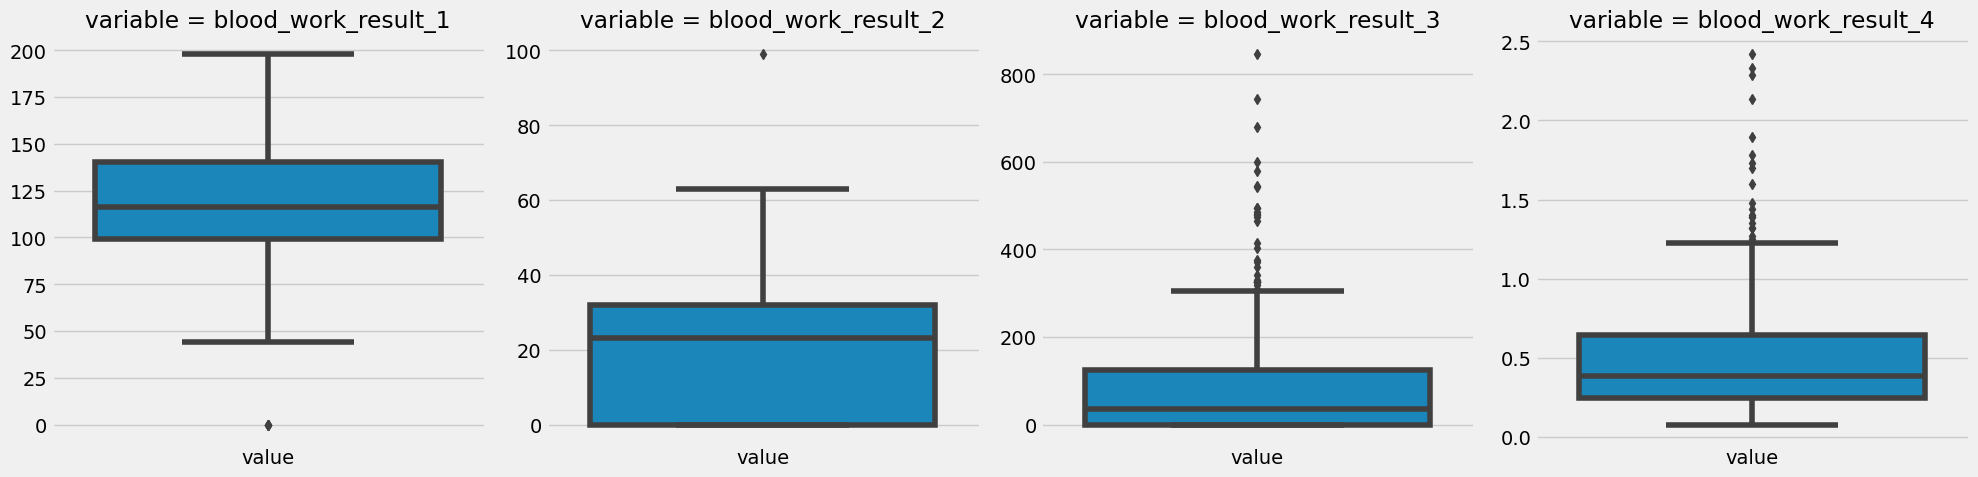

In [28]:
df = train[["blood_work_result_1", "blood_work_result_2", "blood_work_result_3", "blood_work_result_4"]]

df = df.melt(var_name='variable', value_name='value')

sns.catplot (kind="box", data=df, col="variable", sharey=False)

### From the four blood work result the last two's have outliers. We can correct those by using mean method.

In [29]:
# Define a function to detect outliers using the z-score method
def is_outlier(x):
    # Calculate the z-score of x
    z = (x - mean) / std
    # Return True if x is more than 3 standard deviations away from the mean
    return abs(z) > 3

#### Correcting third result

In [30]:
# Create a sample dataframe with one column
df["blood_work_result_3"] = train["blood_work_result_3"]

# Calculate the mean and standard deviation of the column 
mean = df["blood_work_result_3"].mean()
std = df["blood_work_result_3"].std()

In [31]:
outliers = df[is_outlier(df["blood_work_result_3"])].blood_work_result_3
outliers.index

Int64Index([8, 13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486, 584], dtype='int64')

In [32]:
index = [8, 13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486, 584]

# Use loc() to change the column records using the indexes
train.loc[index, 'blood_work_result_3'] = mean

In [33]:
for i in outliers.index:
    train.loc[i, "blood_work_result_3"] = mean

#### Correcting fourth result

In [34]:
# Create a sample dataframe with one column
df["blood_work_result_4"] = train["blood_work_result_4"]

# Calculate the mean and standard deviation of the column 
mean = df["blood_work_result_4"].mean()
std = df["blood_work_result_4"].std()

In [35]:
outliers = df[is_outlier(df["blood_work_result_4"])].blood_work_result_4
outliers.index

Int64Index([4, 45, 58, 228, 370, 371, 395, 445, 593], dtype='int64')

In [36]:
index = [4, 12, 45, 58, 330, 371, 395, 445, 593]

# Use loc() to change the column records using the indexes
train.loc[index, 'blood_work_result_4'] = mean

In [37]:
for i in outliers.index:
    train.loc[i, "blood_work_result_4"] = mean

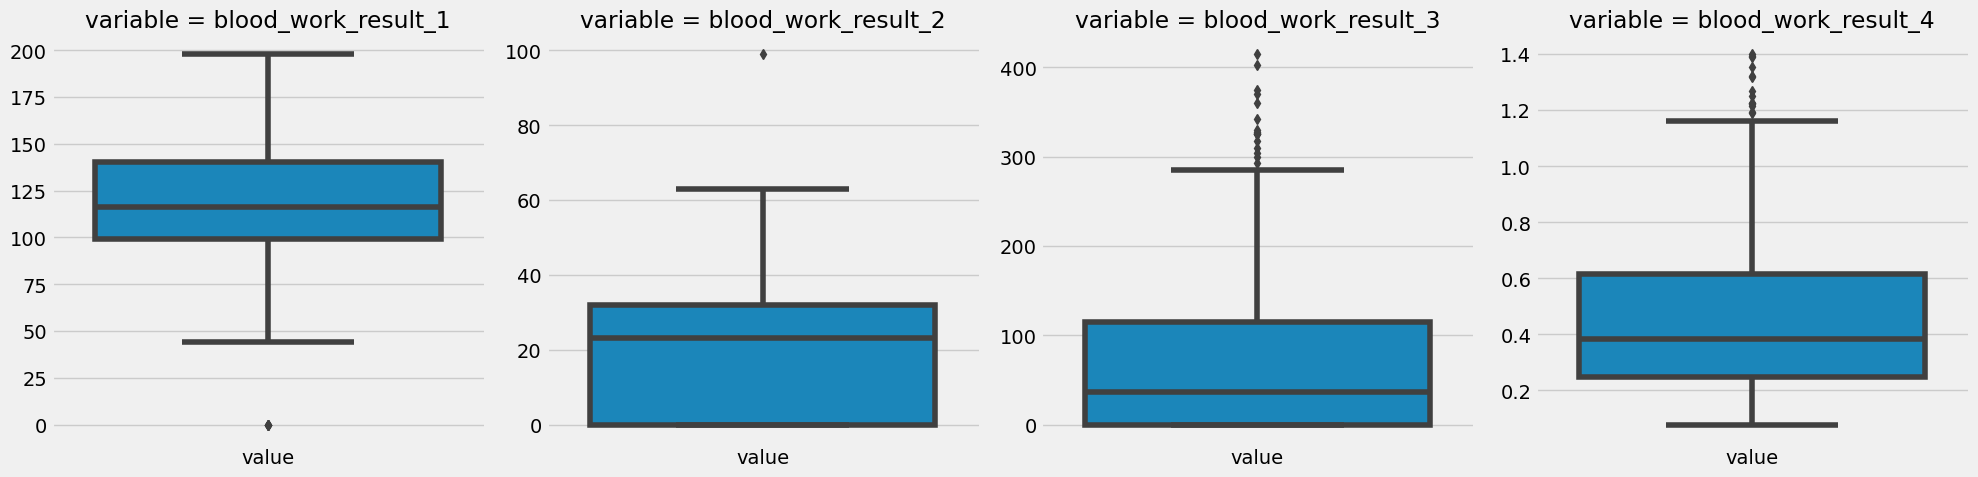

In [38]:
df = train[["blood_work_result_1", "blood_work_result_2", "blood_work_result_3", "blood_work_result_4"]]

df = df.melt(var_name='variable', value_name='value')

sns.catplot (kind="box", data=df, col="variable", sharey=False)

## Bivariate and Multivariate analysis

### Bivariate Analysis

In [39]:
age_by_insurance = train.groupby('Age').mean()["Insurance"]
age_by_insurance

Age
21    0.673077
22    0.634615
23    0.555556
24    0.675676
25    0.700000
26    0.680000
27    0.666667
28    0.769231
29    0.703704
30    0.687500
31    0.684211
32    0.692308
33    0.800000
34    0.444444
35    0.500000
36    0.846154
37    0.444444
38    0.692308
39    0.700000
40    0.875000
41    0.800000
42    0.923077
43    0.625000
44    0.571429
45    0.625000
46    0.727273
47    0.750000
48    0.666667
49    0.666667
50    0.750000
51    0.714286
52    0.400000
53    1.000000
54    1.000000
55    0.750000
56    0.500000
57    0.600000
58    1.000000
59    0.333333
60    0.800000
61    1.000000
62    0.750000
63    0.666667
64    1.000000
65    0.333333
66    0.666667
67    1.000000
69    0.000000
72    1.000000
81    1.000000
Name: Insurance, dtype: float64

<AxesSubplot:xlabel='Age'>

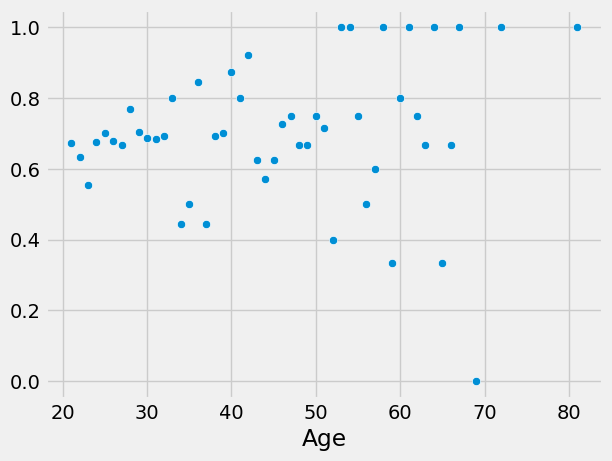

In [40]:
sns.scatterplot(x=age_by_insurance.index, y=age_by_insurance.values)

In [41]:
train

,id,plasma_glucose,blood_work_result_1,blood_pressure,blood_work_result_2,blood_work_result_3,body_mass_index,blood_work_result_4,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0.0,33.6,0.627000,50,0,Positive
1,ICU200011,1,85,66,29,0.0,26.6,0.351000,31,0,Negative
2,ICU200012,8,183,64,0,0.0,23.3,0.672000,32,1,Positive
3,ICU200013,1,89,66,23,94.0,28.1,0.167000,21,1,Negative
4,ICU200014,0,137,40,35,168.0,43.1,0.481187,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230.0,33.6,0.733000,34,0,Negative
595,ICU200605,0,188,82,14,185.0,32.0,0.682000,22,1,Positive
596,ICU200606,0,67,76,0,0.0,45.3,0.194000,46,1,Negative
597,ICU200607,1,89,24,19,25.0,27.8,0.559000,21,0,Negative


In [42]:
df = train.copy()
df["Sepssis"] = train["Sepssis"].replace({"Positive" :1 , "Negative" : 0})

<AxesSubplot:xlabel='Age'>

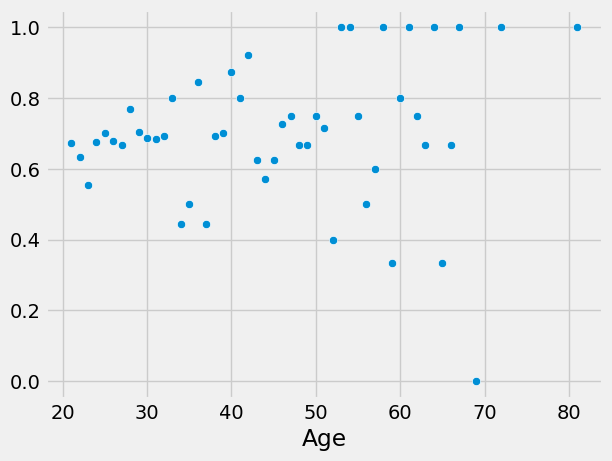

In [43]:
sns.scatterplot(x=age_by_insurance.index, y=age_by_insurance.values)

#### At the age of 30 50 there is a lot of chance for peoples being under insurance coverage.

## Balancing target data

In [46]:
target_t = train.Sepssis

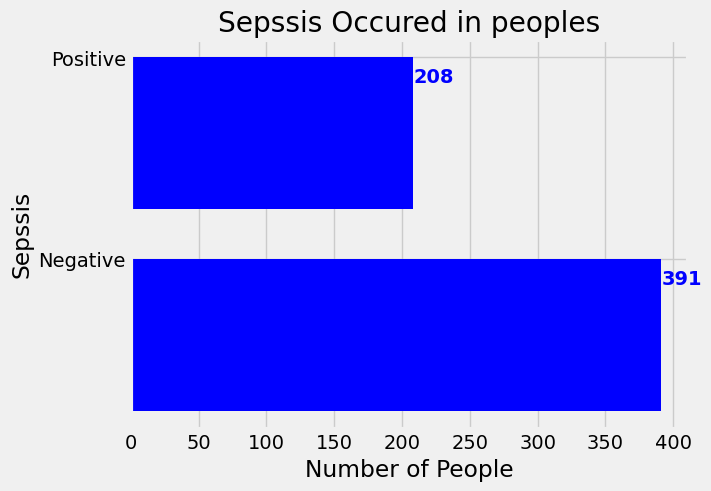

In [50]:
a = target_t.value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('Sepssis Occured in peoples')
plt.ylabel('Sepssis')
plt.xlabel('Number of People')
plt.show()

In [61]:
train = train.drop("id" , axis=1)

In [65]:
mapping = {"Positive": 1, "Negative": 0}
train["Sepssis"] = train["Sepssis"].replace(mapping)


In [66]:
train.head()

,plasma_glucose,blood_work_result_1,blood_pressure,blood_work_result_2,blood_work_result_3,body_mass_index,blood_work_result_4,Age,Insurance,Sepssis
0,6,148,72,35,0.0,33.6,0.627000,50,0,1
1,1,85,66,29,0.0,26.6,0.351000,31,0,0
2,8,183,64,0,0.0,23.3,0.672000,32,1,1
3,1,89,66,23,94.0,28.1,0.167000,21,1,0
4,0,137,40,35,168.0,43.1,0.481187,33,1,1


In [71]:
x = train.drop("Sepssis" , axis = 1)
y = train.Sepssis

In [67]:
nm = SMOTE(random_state = 43)

In [73]:
data_balanced_t , target_balanced_t = nm.fit_resample(x , y)

In [75]:
target_balanced_t.value_counts()

1    391
0    391
Name: Sepssis, dtype: int64

## Machine Learning


In [78]:
# splitting data
data_train, data_test, target_train, target_test = train_test_split(
    data_balanced_t, target_balanced_t, random_state=42 
)

In [81]:
model_trained = [] 

## logistic Regression

In [84]:
log = LogisticRegression()

In [91]:
log.fit(data_train , target_train )

LogisticRegression()

In [93]:
target_predicted = log.predict(data_test)

In [97]:
print("classification report for :" , log.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : LogisticRegression()
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        99
           1       0.68      0.73      0.71        97

    accuracy                           0.70       196
   macro avg       0.70      0.70      0.70       196
weighted avg       0.70      0.70      0.70       196



## Hist

In [98]:
hist = HistGradientBoostingClassifier()

In [99]:
hist.fit(data_train , target_train )

HistGradientBoostingClassifier()

In [100]:
target_predicted = hist.predict(data_test)

In [101]:
print("classification report for :" , hist.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : HistGradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.87      0.68      0.76        99
           1       0.73      0.90      0.81        97

    accuracy                           0.79       196
   macro avg       0.80      0.79      0.78       196
weighted avg       0.80      0.79      0.78       196



## K-Nearest Neihgbors

In [102]:
kn = KNeighborsClassifier(n_neighbors=5)

In [103]:
kn.fit(data_train , target_train )

KNeighborsClassifier()

In [104]:
print("classification report for :" , kn.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.87      0.68      0.76        99
           1       0.73      0.90      0.81        97

    accuracy                           0.79       196
   macro avg       0.80      0.79      0.78       196
weighted avg       0.80      0.79      0.78       196



## Support vector machines( SVM )

In [105]:
sv = svm.SVC()

In [106]:
sv.fit(data_train , target_train)

SVC()

In [107]:
target_predicted = sv.predict(data_test)

In [108]:
print("classification report for :" , sv.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : SVC()
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        99
           1       0.71      0.74      0.73        97

    accuracy                           0.72       196
   macro avg       0.72      0.72      0.72       196
weighted avg       0.72      0.72      0.72       196



## Decision Classifier Model

In [110]:
ds = DecisionTreeClassifier()

In [111]:
ds.fit(data_train , target_train)

DecisionTreeClassifier()

In [112]:
target_predicted = ds.predict(data_test)

In [113]:
print("classification report for :" , ds.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        99
           1       0.70      0.78      0.74        97

    accuracy                           0.72       196
   macro avg       0.73      0.73      0.72       196
weighted avg       0.73      0.72      0.72       196



## Random Forest

In [114]:
rm = RandomForestClassifier()

In [115]:
rm.fit(data_train , target_train)

RandomForestClassifier()

In [116]:
target_predicted = ds.predict(data_test)

In [117]:
print("classification report for :" , ds.__str__())
print(classification_report(y_true = target_test , y_pred = target_predicted ))

classification report for : DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        99
           1       0.70      0.78      0.74        97

    accuracy                           0.72       196
   macro avg       0.73      0.73      0.72       196
weighted avg       0.73      0.72      0.72       196



## Hyper parameter tunning

In [118]:
model_params = {
    
    "hist gradient classifier" : {
        "model" : HistGradientBoostingClassifier(),
        "params" : {
            "loss" : ["log_loss" , "auto" , "binary_crossentropy" , "categorical_crossentropy" ],
            "learning_rate" : [0.1 , 1 , 2 ,3],
            "max_depth" : [25 , 50 , 75 , None],
            "l2_regularization" : [0 , 1.25 , 1.5 , 2],
            "scoring" : ["f1_micro" , "loss"]
        }
    }
}

In [121]:
scores = []
a = 0
for model_name , mp in model_params.items():
    a = a + 50
    clf = GridSearchCV(mp["model"] , mp["params"] , cv = 5 , return_train_score=False)
    clf.fit(data_train , target_train)
    scores.append({
        "model" : model_name,
        "best_score" : clf.best_score_,
        "best_params" : clf.best_params_
    })
    print(a , " percent")

50  percent


In [124]:
scores

[{'model': 'hist gradient classifier',
  'best_score': 0.8054613935969867,
  'best_params': {'l2_regularization': 1.5,
   'learning_rate': 0.1,
   'loss': 'auto',
   'max_depth': 25,
   'scoring': 'f1_micro'}}]

In [122]:
df = pd.DataFrame(scores)
df

,model,best_score,best_params
0,hist gradient classifier,0.805461,"{'l2_regularization': 1.5, 'learning_rate': 0...."


## Pipeline

In [131]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(
    StandardScaler(),
    HistGradientBoostingClassifier(
        l2_regularization = 1.5,
        learning_rate = 0.1,
        loss = 'auto',
        max_depth = 25,
        scoring = 'f1_micro' )
)


In [132]:
pipe.fit(data_train , target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(l2_regularization=1.5,
                                                max_depth=25,
                                                scoring='f1_micro'))])

## Saving the pipeline

In [ ]:
pip install joblib

In [ ]:
from sklearn.externals import joblib
joblib.dump(pipe, "pipeline.pkl")
